In [1]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from kdd_oh_set import ohkdd
import net_hook

In [2]:
use_gpu = False
train_data = ohkdd(use_gpu=use_gpu)
dataloader = DataLoader(train_data, batch_size=1, shuffle=True, drop_last=True)
print(len(train_data))

1124263


In [3]:
color={'normal':'b','abnormal':'r','dos':'r','probe':'m','r2l':'g','u2r':'y','marker':'.'}

def fig2d(net, hook, dis, num):  #模型，钩子，距离函数
    plt.figure("aenet")
    for i, (x, y) in enumerate(dataloader):
        if i == num:
            break
        x = torch.autograd.Variable(x)
        output = net(x)
        # print(x.shape,output.shape)
        cossim = dis(x, output).detach().numpy()
        fea = hook.fea.detach().numpy()
        # print(fea.shape,cossim.shape)
        if y == 1:
            plt.plot(fea[0][0], cossim, color['normal']+color['marker'])
        else:
            plt.plot(fea[0][0], cossim, color['abnormal']+color['marker'])
    plt.xlabel("reduce")
    plt.ylabel("distance")

    # plt.plot([], [], "b.", label='normal')
    # plt.plot([], [], "r.", label='abnormal')
    # plt.legend()

    plt.savefig("./{}_1key.svg".format(dis), format="svg")
    plt.show()


def fig3d(net, hook, dis, num):  #模型，钩子，距离函数
    ax = plt.axes(projection='3d')
    for i, (x, y) in enumerate(dataloader):
        if i == num:
            break
        x = torch.autograd.Variable(x)
        output = net(x)
        cossim = dis(x, output).detach().numpy()
        fea = hook.fea.detach().numpy()
        # print(fea.shape,cossim.shape)
        if y == 0:
            ax.scatter(*fea[0][0], cossim, c=color['normal'], marker=color['marker'])
        else:
            ax.scatter(*fea[0][0], cossim, c=color['abnormal'], marker=color['marker'])

    ax.set_xlabel("key1")
    ax.set_ylabel("key2")
    ax.set_zlabel("dis")
    ax.set_title("ae_2key")

    # ax.scatter([], [], [], c='b', marker='.', label='normal')
    # ax.scatter([], [], [], c='r', marker='.', label='abnormal')
    # ax.legend()

    plt.savefig("./{}_2key.svg".format(dis), format="svg")
    plt.show()


def plt_from_net(net_path: str, dis, demension, num=50):
    net = torch.load(net_path)
    hook = net_hook.get_fea_by_hook(net.keylayer())
    print("read net from: {}\nhook layer: {}".format(net_path, net.keylayer()))
    if not use_gpu:
        net = net.cpu()
    if demension == 2:
        fig2d(net, hook, dis, num)
    elif demension == 3:
        fig3d(net, hook, dis, num)
    else:
        raise UserWarning("demension should in [2,3]")

read net from: aenet_1key
hook layer: Sequential(
  (0): Linear(in_features=40, out_features=1, bias=True)
  (1): Sigmoid()
)


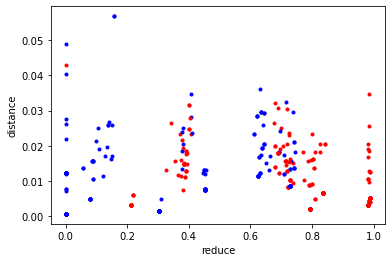

In [4]:
plt_from_net("aenet_1key", torch.nn.MSELoss(), 2, 500)
# plt_from_net("aenet_2key", torch.nn.MSELoss(), 3, 500)